In [1]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
try:
    from create_feature_set import define_indicators_features
except:
    !wget https://raw.githubusercontent.com/Jpaku93/ML_Stock_Regression/main/create_feature_set.py
    from create_feature_set import define_indicators_features
    
def call_data(URL): ## function to call data TXT FILE
    data = pd.read_csv(URL, names=['time', 'open', 'high', 'low', 'close', 'volume'], delimiter = ";", index_col='time')
    data = data.drop_duplicates()

    return data

def apply_features(df):
    # store time variables
    time = df.index
    # get feature dataset
    features = define_indicators_features(df)
    features['time'] = pd.to_datetime(time)
    #set time as index
    features = features.set_index('time')
    return features

# get github txt file url
url = 'https://raw.githubusercontent.com/Jpaku93/ML_Stock_Regression/main/MES%2006-21.Last.txt'
data = call_data(url)[-10000:]
data = apply_features(data)
# drop rows with nan values
data = data.dropna()
data.head()

,open,high,low,close,volume,fast_ema,slow_ema,macd,signal,sma21,...,STDDEV,H-L,H-PC,L-PC,TR,ATR,TSI,BP,UO,COPP
time,,,,,,,,,,,,,,,,,,,,,
2021-06-08 06:12:00,4229.00,4229.00,4228.50,4228.50,15,4228.288511,4227.681069,0.607442,0.474599,4227.416667,...,1.022582,0.50,0.00,0.5,0.50,0.750000,0.250657,0.00,47.230017,0.000747
2021-06-08 06:13:00,4228.50,4228.50,4228.00,4228.25,62,4228.282586,4227.723212,0.559374,0.491554,4227.511905,...,0.868599,0.50,0.00,0.5,0.50,0.750000,0.229609,0.25,49.195883,0.000714
2021-06-08 06:14:00,4228.25,4228.75,4228.25,4228.25,72,4228.277573,4227.762234,0.515339,0.496311,4227.619048,...,0.575364,0.50,0.50,0.0,0.50,0.750000,0.213094,0.00,42.517007,0.000641
2021-06-08 06:15:00,4228.50,4228.50,4228.25,4228.50,35,4228.311792,4227.816883,0.494910,0.496031,4227.738095,...,0.312843,0.25,0.25,0.0,0.25,0.678571,0.206170,0.25,46.005924,0.000548
2021-06-08 06:16:00,4228.50,4228.50,4228.00,4228.25,89,4228.302286,4227.848966,0.453320,0.487489,4227.857143,...,0.284682,0.50,0.00,0.5,0.50,0.625000,0.190988,0.25,40.514456,0.000417


In [2]:
### import necessary Neural network packages 
import numpy as np 
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import tensorflow.keras.callbacks as cb
from keras.models import load_model
from math import exp, log

In [3]:
### define some global parameters
# "look back" days. This is the number of historical days we use to predict tomorrow. Personally, I don't like the term "look back" because
# it is quite confusing. However, it seems that this term has become the convention in the field of CNN/RNN stock prediction, so I will use it
# here as well. In LSTM, this is the number of time steps.
LB = 3
# number of epochs. setting it too high might cause overfitting, setting it too low the model won't get enough training.
# so setting epochs to an adequate number is very important. How big this number should be is more an art. some people examine the
# test set performance metrics (such as loss, accuracy) during iterations of training and then decide how many epochs to go to. However,
# this approach peeks into the test set, and thus invalidates the purpose of the test set. Maybe RNN/CNN should internally divide its 
# training data into two parts, use one part for internal training, the other part for internal testing, or use something like Leave-one-out
# and find an appropriate number of epochs.
EPOCHS = 50
# print("data shape = " + str(data.shape))

# pricevalues = data.iloc[:, :5] # Prive & Volume. Only use Open, High, Low, Close, Volume columns for prediction

Epoch 1/50
197/197 [==============================] - 8s 13ms/step - loss: 0.0362 - val_loss: 0.0011
Epoch 2/50
197/197 [==============================] - 2s 10ms/step - loss: 4.2966e-04 - val_loss: 9.4793e-04
Epoch 3/50
197/197 [==============================] - 2s 10ms/step - loss: 3.0601e-04 - val_loss: 6.0415e-04
Epoch 4/50
197/197 [==============================] - 2s 10ms/step - loss: 2.0752e-04 - val_loss: 2.3591e-04
Epoch 5/50
197/197 [==============================] - 2s 10ms/step - loss: 1.4752e-04 - val_loss: 1.7356e-04
Epoch 6/50
197/197 [==============================] - 2s 10ms/step - loss: 1.1871e-04 - val_loss: 1.1182e-04
Epoch 7/50
197/197 [==============================] - 2s 10ms/step - loss: 1.0551e-04 - val_loss: 1.3922e-04
Epoch 8/50
197/197 [==============================] - 2s 10ms/step - loss: 1.0328e-04 - val_loss: 1.0271e-04
Epoch 9/50
197/197 [==============================] - 2s 10ms/step - loss: 1.0303e-04 - val_loss: 9.8813e-05
Epoch 10/50
197/197 [======

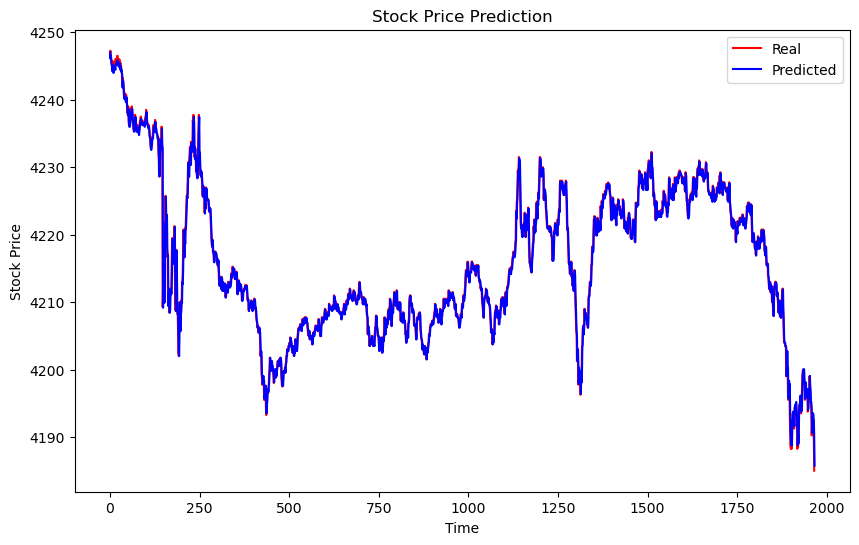

In [4]:
# Create an RNN LSTM model class to predict the price of a stock
class RNN_LSTM_price_prediction:
    def __init__(self, data, LB, EPOCHS):
        self.data = data
        self.LB = LB
        self.EPOCHS = EPOCHS
        self.model = None
        self.scaler = None
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None
        self.X_train_scaled = None
        self.y_train_scaled = None
        self.X_test_scaled = None
        self.y_test_scaled = None

    def split_data(self, test_size=0.2):
        # split data into train and test set
        self.X_train = self.data.iloc[:-int(len(self.data) * test_size), :]
        self.y_train = self.data.iloc[1:-int(len(self.data) * test_size) + 1, 0]
        self.X_test = self.data.iloc[-int(len(self.data) * test_size):, :]
        self.y_test = self.data.iloc[-int(len(self.data) * test_size) + 1:, 0]
        
    
    def scale_data(self):
        # scale data
        from sklearn.preprocessing import MinMaxScaler
        self.scaler = MinMaxScaler()
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.y_train_scaled = self.scaler.fit_transform(self.y_train.values.reshape(-1, 1))
        self.X_test_scaled = self.scaler.fit_transform(self.X_test)
        self.y_test_scaled = self.scaler.fit_transform(self.y_test.values.reshape(-1, 1))
        
    def create_model(self):
        # create model
        self.model = Sequential()
        self.model.add(LSTM( units=50, return_sequences=True, input_shape=(self.X_train_scaled.shape[1], 1)))
        self.model.add(LSTM(units=50, return_sequences=True))
        self.model.add(LSTM(units=50))
        self.model.add(Dense(1))
        self.model.compile(loss='mean_squared_error', optimizer='adam')
        
    def train_model(self):
        # train model
        self.model.fit(
            self.X_train_scaled.reshape(self.X_train_scaled.shape[0], self.X_train_scaled.shape[1], 1),
            self.y_train_scaled,
            epochs=self.EPOCHS,
            batch_size=32,
            verbose=1,
            validation_split=0.2,
            callbacks=[cb.EarlyStopping(monitor='val_loss', patience=10)]
        )
        
        
    def predict(self):
        # predict
        self.y_pred = self.model.predict(self.X_test_scaled.reshape(self.X_test_scaled.shape[0], self.X_test_scaled.shape[1], 1))
        self.y_pred = self.scaler.inverse_transform(self.y_pred)
        self.y_test = self.scaler.inverse_transform(self.y_test_scaled)

        
    def plot(self):
        # plot
        plt.figure(figsize=(10, 6))
        plt.plot(self.y_test, color='red', label='Real')
        plt.plot(self.y_pred, color='blue', label='Predicted')
        plt.title('Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()
        
    def run(self):
        self.split_data()
        self.scale_data()
        self.create_model()
        self.train_model()
        self.predict()
        self.plot()
        

# create an instance of the class
rnn_lstm = RNN_LSTM_price_prediction(data['close'].to_frame(), LB, EPOCHS)
rnn_lstm.run()


In [7]:
# predict the next day
def predict_next_day(data):

    # scale the data to be values between 0 and 1
    last_60_days_scaled = rnn_lstm.scaler.transform(data)
    # create an empty list
    X_test = []
    # append the past 60 days
    X_test.append(last_60_days_scaled)
    # convert the X_test data set to a numpy array
    X_test = np.array(X_test)
    # reshape the data
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # get the predicted scaled price
    pred_price = rnn_lstm.model.predict(X_test)
    # undo the scaling
    pred_price = rnn_lstm.scaler.inverse_transform(pred_price)
    # print( "recent price: ", data[-1], ' predicted price: ', pred_price[0][0])
    print(pred_price[0][0].shape)
    return pred_price[0][0]

In [6]:
predict_step = 30
look_back = 60
# get the last 100 day closing price
testdays = data['close'].to_frame().tail(100).values
pred_test = testdays[-look_back]


next_day = predict_next_day(predict)
# predict a day and add it to the list
# for i in range(predict_step):
#     next_day = predict_next_day(predict)
#     predict = np.append(predict, next_day)
# add to prediction to predict list

predict = np.append(predict, next_day.valu)


next_day = predict_next_day(predict)

# predict = np.append(predict, next_day)
# print(len(predict))

# plot
plt.figure(figsize=(10, 6))
plt.plot(predict, color='red', label='Real')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
    

SyntaxError: invalid syntax (703294938.py, line 5)